In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import time

In [2]:
data = pd.read_excel("D:/datasets/ODI Cricket Matches.xlsx")

In [3]:
data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950
...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),2018-11-11,ODI # 4070
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Team 1      128 non-null    object        
 1   Team 2      128 non-null    object        
 2   Winner      128 non-null    object        
 3   Margin      123 non-null    object        
 4   Ground      128 non-null    object        
 5   Match Date  128 non-null    datetime64[ns]
 6   Scorecard   128 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 7.1+ KB


### * No missing values
### * Except date column, all is object datatype

### Data Cleaning

In [5]:
# Winner column has some weird values
for col in data.columns:
    print(data[col].unique())
    print("----------------------------------------------")

['New Zealand' 'U.A.E.' 'Australia' 'Bangladesh' 'Ireland' 'Sri Lanka'
 'South Africa' 'Afghanistan' 'P.N.G.' 'Hong Kong' 'Zimbabwe' 'Scotland'
 'England' 'West Indies' 'Netherlands' 'Nepal' 'India']
----------------------------------------------
['Pakistan' 'Ireland' 'England' 'Zimbabwe' 'Scotland' 'Sri Lanka' 'India'
 'U.A.E.' 'P.N.G.' 'West Indies' 'Afghanistan' 'Hong Kong' 'Australia'
 'Bangladesh' 'South Africa' 'Nepal']
----------------------------------------------
['New Zealand' 'Ireland' 'England' 'Bangladesh' 'Zimbabwe' 'Scotland'
 'Sri Lanka' 'U.A.E.' 'Australia' 'India' 'Afghanistan' 'South Africa'
 'West Indies' 'Hong Kong' 'tied' 'P.N.G.' 'Pakistan' 'Netherlands'
 'Nepal' 'no result']
----------------------------------------------
['61 runs' '8 wickets' '4 wickets' '183 runs' '67 runs' '5 wickets'
 '6 wickets' '12 runs' '24 runs' '15 runs' '163 runs' '16 runs' '31 runs'
 '91 runs' '10 wickets' '3 wickets' '79 runs' '9 wickets' '124 runs'
 '154 runs' '73 runs' '146 runs' '

In [6]:
# Winner column has some weird values
for col in data.columns:
    print(data[col].value_counts())
    print("----------------------------------------------")

Afghanistan     16
Bangladesh      15
New Zealand     13
Sri Lanka       12
Zimbabwe        11
South Africa     9
Ireland          9
Australia        8
England          8
India            7
U.A.E.           5
Hong Kong        4
West Indies      3
Scotland         3
Netherlands      2
P.N.G.           2
Nepal            1
Name: Team 1, dtype: int64
----------------------------------------------
Pakistan        18
England         16
Zimbabwe        15
West Indies     15
India           13
South Africa     8
Scotland         8
U.A.E.           6
Bangladesh       5
Australia        5
Sri Lanka        5
Afghanistan      4
Ireland          4
Nepal            2
P.N.G.           2
Hong Kong        2
Name: Team 2, dtype: int64
----------------------------------------------
England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
Pakistan         8
New Zealand      8
Ireland          8
West Indies      8
Sri Lanka        6
Zimbabwe         5
Scotland        

* we have two rows with <b>no result</b> value

In [7]:
no_res = data[data['Winner'] == "no result"]
no_res

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
106,Sri Lanka,England,no result,NaN,Dambulla,2018-10-10,ODI # 4052
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),2018-11-11,ODI # 4070


* The reason for <b>no result</b> is <b>RAIN!!!!</b>

In [8]:
no_res.index.values.tolist()

[106, 124]

In [9]:
# Since all the visualization or analysis will be based on these countries, i will drop these two rows.
data = data.drop(no_res.index.values.tolist())
data.reset_index(inplace = True)

In [10]:
data['Winner'].unique()

array(['New Zealand', 'Ireland', 'England', 'Bangladesh', 'Zimbabwe',
       'Scotland', 'Sri Lanka', 'U.A.E.', 'Australia', 'India',
       'Afghanistan', 'South Africa', 'West Indies', 'Hong Kong', 'tied',
       'P.N.G.', 'Pakistan', 'Netherlands', 'Nepal'], dtype=object)

In [11]:
# setting the value of 'P.N.G.' to Papua New Gunea
data['Team 1'].replace({'P.N.G.':"Papua New Guinea", 'U.A.E.': "United Arab Emirates"}, inplace = True)
data['Team 2'].replace({'P.N.G.':"Papua New Guinea", 'U.A.E.': "United Arab Emirates"}, inplace = True)
data['Winner'].replace({'P.N.G.':"Papua New Guinea", 'U.A.E.': "United Arab Emirates"}, inplace = True)
data['Ground'].replace({'P.N.G.':"Papua New Guinea", 'U.A.E.': "United Arab Emirates"}, inplace = True)

## Plot all the countries who played the ODI match

In [12]:
# get all the countries name from the dataset
all_countries = list(data['Team 1'].unique())
country = list(data['Team 2'].unique())
all_countries.extend(country)

In [13]:
all_countries = list(set(all_countries))
print("countries participated in ODI: ",all_countries)
print("Total countries participated in ODI: ",len(all_countries))

countries participated in ODI:  ['Sri Lanka', 'Ireland', 'Australia', 'Hong Kong', 'Papua New Guinea', 'England', 'West Indies', 'Afghanistan', 'Netherlands', 'Zimbabwe', 'Bangladesh', 'Pakistan', 'United Arab Emirates', 'Scotland', 'Nepal', 'South Africa', 'New Zealand', 'India']
Total countries participated in ODI:  18


In [14]:
# we got the countries, now we need to get the longitude and latitude of the countries to plot the map
# we can use geopy library for that
from geopy.geocoders import ArcGIS

gis = ArcGIS()
gis.geocode('U.A.E').latitude

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


23.914869621000037

In [18]:
lat = []
lon = []
for i in all_countries:
    lat.append(gis.geocode(i).latitude)
    lon.append(gis.geocode(i).longitude)

In [20]:
countries_df = pd.DataFrame({'countries':all_countries,"latitude":lat, "longitude":lon})
countries_df

,countries,latitude,longitude
0,Sri Lanka,7.617678,80.698632
1,Ireland,53.175880,-8.146006
2,Australia,-25.709932,134.484031
3,Hong Kong,22.351958,114.119386
4,Papua New Guinea,-6.475590,145.253801
5,England,52.592733,-1.458627
6,West Indies,19.383330,-71.216670
7,Afghanistan,33.831137,66.024712
8,Netherlands,52.249375,5.616126
9,Zimbabwe,-19.016205,29.884277


In [21]:
import folium

In [22]:
map_country = folium.Map(location=([-6.475590, 145.253801]))
fg = folium.FeatureGroup(name = 'country')
permanent_odi_status = ['Australia', 'England', 'New Zealand', 'Pakistan', 'West Indies', 'India', 
                        'Sri Lanka', 'South Africa', 'Zimbabwe', 'Bangladesh', 'Afghanistan','Ireland']
for i in range(len(countries_df)):
    if all_countries[i] in permanent_odi_status:
        fg.add_child(folium.Marker(location = [lat[i], lon[i]], popup=all_countries[i], icon=folium.Icon(color = 'green')))
    else:
        fg.add_child(folium.Marker(location = [lat[i], lon[i]], popup=all_countries[i], icon=folium.Icon(color = 'blue')))
    
map_country.add_child(fg)

# Among these countries:
### Permanent ODI status holding teams are coloured in green:
 * Australia (5 January 1971)
 * England (5 January 1971)
 * New Zealand (11 February 1973)
 * Pakistan (11 February 1973)
 * West Indies (5 September 1973)
 * India (13 July 1974)
 * Sri Lanka (13 February 1982)
 * South Africa (10 November 1991)
 * Zimbabwe (25 October 1992)
 * Bangladesh (10 October 1997)
 * Afghanistan (5 December 2017)
 * Ireland (5 December 2017)
### Rest of the teams have temporary ODI status:

### Task 1) Transform the Margin in two columns, one for runs and another for wicketes.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       126 non-null    int64         
 1   Team 1      126 non-null    object        
 2   Team 2      126 non-null    object        
 3   Winner      126 non-null    object        
 4   Margin      123 non-null    object        
 5   Ground      126 non-null    object        
 6   Match Date  126 non-null    datetime64[ns]
 7   Scorecard   126 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 8.0+ KB


In [24]:
data['first_batting'] = data['Margin'].apply(lambda x: x if str(x).endswith("runs") else " ")
data['second_batting'] = data['Margin'].apply(lambda x: x if str(x).endswith("wickets") else " ")

In [25]:
data

,index,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,first_batting,second_batting
0,0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,61 runs,
1,1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,,8 wickets
2,2,United Arab Emirates,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,,4 wickets
3,3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,183 runs,
4,4,United Arab Emirates,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,67 runs,
...,...,...,...,...,...,...,...,...,...,...
121,122,New Zealand,Pakistan,Pakistan,6 wickets,Abu Dhabi,2018-11-09,ODI # 4068,,6 wickets
122,123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069,40 runs,
123,125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071,,5 wickets
124,126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072,,4 wickets


### Most of the matches are won by first batting or second batting?

In [26]:
data['first_batting'].nunique()-1

53

Text(0.5, 1.0, 'Most of the matches are won by first batting or second batting?')

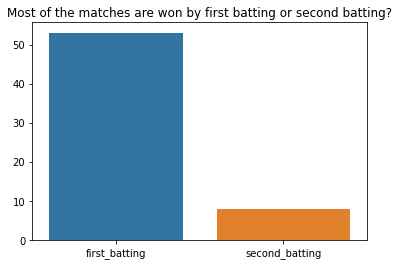

In [27]:
sns.barplot(x = ['first_batting', 'second_batting'], 
            y = [data['first_batting'].nunique()-1, data['second_batting'].nunique()-1]
           )
plt.title("Most of the matches are won by first batting or second batting?")

* so most of the matches are won by first batting.
* so chances of winning is high if teams does batting first.
* Winning the game on second batting is tough.

### plotting the countries who won by first batting and second batting

In [28]:
countries_df[countries_df['countries'] == 'Pakistan']['latitude'].values[0]

30.314282999000056

In [29]:
# let's make the list of countries who won first batting
first_bat_win = list(set(data[data['first_batting'] != ' ']['Winner'].tolist()))
first_bat_win_lat = []
first_bat_win_lon = []
for i in first_bat_win:
    first_bat_win_lat.append(countries_df[countries_df['countries'] == i]['latitude'].values[0])
    first_bat_win_lon.append(countries_df[countries_df['countries'] == i]['longitude'].values[0])

In [30]:
map_country = folium.Map(location=([-6.475590, 145.253801]))
fg = folium.FeatureGroup(name = 'country')

for i in range(len(first_bat_win)):
    fg.add_child(folium.Marker(location = [first_bat_win_lat[i], first_bat_win_lon[i]], popup=first_bat_win[i], icon=folium.Icon(color = 'pink')))
    
map_country.add_child(fg)

In [31]:
# let's make the list of countries who won first batting
second_bat_win = list(set(data[data['second_batting'] != ' ']['Winner'].tolist()))
second_bat_win_lat = []
second_bat_win_lon = []
for i in second_bat_win:
    second_bat_win_lat.append(countries_df[countries_df['countries'] == i]['latitude'].values[0])
    second_bat_win_lon.append(countries_df[countries_df['countries'] == i]['longitude'].values[0])

In [32]:
map_country = folium.Map(location=([-6.475590, 145.253801]))
fg = folium.FeatureGroup(name = 'country')

for i in range(len(second_bat_win)):
    fg.add_child(folium.Marker(location = [second_bat_win_lat[i], second_bat_win_lon[i]], popup=second_bat_win[i], icon=folium.Icon(color = 'pink')))
    
map_country.add_child(fg)

### Q2) Which country played the most ODIs in 2018

In [34]:
a = pd.DataFrame({'countries':data['Team 1'].value_counts().keys(), 'count':data['Team 1'].value_counts()})
b = pd.DataFrame({'countries':data['Team 2'].value_counts().keys(), 'count':data['Team 2'].value_counts()})

In [35]:
a.reset_index(drop = True, inplace = True)

In [36]:
b.reset_index(drop = True, inplace = True)

In [37]:
a

,countries,count
0,Afghanistan,16
1,Bangladesh,15
2,New Zealand,12
3,Zimbabwe,11
4,Sri Lanka,11
5,South Africa,9
6,Ireland,9
7,England,8
8,Australia,8
9,India,7


In [38]:
b

,countries,count
0,Pakistan,17
1,Zimbabwe,15
2,England,15
3,West Indies,15
4,India,13
5,South Africa,8
6,Scotland,8
7,United Arab Emirates,6
8,Bangladesh,5
9,Australia,5


In [39]:
odi_match = a.merge(b, on = 'countries', how = 'outer')
odi_match.fillna(0, inplace = True)
odi_match['total_match'] = odi_match['count_x'] + odi_match['count_y']
odi_match = odi_match.sort_values('total_match', ascending=False)
odi_match.reset_index(drop=True)

,countries,count_x,count_y,total_match
0,Zimbabwe,11.0,15.0,26.0
1,England,8.0,15.0,23.0
2,Afghanistan,16.0,4.0,20.0
3,Bangladesh,15.0,5.0,20.0
4,India,7.0,13.0,20.0
5,West Indies,3.0,15.0,18.0
6,South Africa,9.0,8.0,17.0
7,Pakistan,0.0,17.0,17.0
8,Sri Lanka,11.0,5.0,16.0
9,Ireland,9.0,4.0,13.0


### Most no. of matches is played by Zimbabwe - 26 and Least No. of matches is played by Netherlands - 2

### Q2) Top 3 countries who won most ODIs

In [40]:
c = pd.DataFrame({'countries':data['Winner'].value_counts().keys(), 'Wins':data['Winner'].value_counts()})
c.reset_index(drop=True, inplace=True)
c

,countries,Wins
0,England,17
1,India,14
2,Bangladesh,13
3,Afghanistan,12
4,South Africa,9
5,Pakistan,8
6,New Zealand,8
7,Ireland,8
8,West Indies,8
9,Sri Lanka,6


In [41]:
data[data['Winner'] == 'tied']

,index,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,first_batting,second_batting
50,50,Zimbabwe,Scotland,tied,NaN,Bulawayo,2018-03-12,ODI # 3996,,
100,100,Afghanistan,India,tied,NaN,Dubai (DSC),2018-09-25,ODI # 4046,,
112,113,India,West Indies,tied,NaN,Visakhapatnam,2018-10-24,ODI # 4059,,


* This could be misleading as number of matches played by teams differ.
* We should look at winning percentage.


In [42]:
winners = data['Winner'].tolist()
win = dict()
loss = dict()
for i in range(len(data)):
    teams = list(data[['Team 1', 'Team 2']].iloc[i])
    if(winners[i] == 'tied'):
        if teams[0] not in win.keys():
            win[teams[0]] = 0
            win[teams[0]] = win[teams[0]] + 0.5
        else:
            win[teams[0]]= win[teams[0]] + 0.5
        if teams[1] not in win.keys():
            win[teams[1]] = 0
            win[teams[1]] = win[teams[1]] + 0.5
        else:
            win[teams[1]] = win[teams[1]] + 0.5
    
    else:
        if winners[i] not in win.keys():
            win[winners[i]] = 0
            win[winners[i]] = win[winners[i]] + 1
        else:
            
            win[winners[i]] = win[winners[i]] + 1
        
        teams.remove(winners[i])
        if teams[0] not in loss.keys():
            loss[teams[0]] = 0
            loss[teams[0]] = loss[teams[0]] + 1
        else:
            loss[teams[0]] = loss[teams[0]] + 1


In [43]:
win

{'New Zealand': 8,
 'Ireland': 8,
 'England': 17,
 'Bangladesh': 13,
 'Zimbabwe': 5.5,
 'Scotland': 5.5,
 'Sri Lanka': 6,
 'United Arab Emirates': 4,
 'Australia': 2,
 'India': 15.0,
 'Afghanistan': 12.5,
 'South Africa': 9,
 'West Indies': 8.5,
 'Hong Kong': 1,
 'Papua New Guinea': 1,
 'Pakistan': 8,
 'Netherlands': 1,
 'Nepal': 1}

In [44]:
loss

{'Pakistan': 9,
 'United Arab Emirates': 7,
 'Australia': 11,
 'Zimbabwe': 20,
 'Scotland': 5,
 'Sri Lanka': 10,
 'Bangladesh': 7,
 'England': 6,
 'South Africa': 8,
 'India': 4,
 'Afghanistan': 7,
 'New Zealand': 4,
 'Papua New Guinea': 3,
 'Hong Kong': 5,
 'Ireland': 5,
 'West Indies': 9,
 'Nepal': 2,
 'Netherlands': 1}

In [45]:
wins = pd.DataFrame({'countries':win.keys(), 'wins': win.values()})
loss = pd.DataFrame({'countries':loss.keys(), 'loss': loss.values()})

result = wins.merge(loss, on = 'countries', how = 'outer')

In [46]:
result = result.merge(odi_match, on = 'countries')
result

,countries,wins,loss,count_x,count_y,total_match
0,New Zealand,8.0,4,12.0,0.0,12.0
1,Ireland,8.0,5,9.0,4.0,13.0
2,England,17.0,6,8.0,15.0,23.0
3,Bangladesh,13.0,7,15.0,5.0,20.0
4,Zimbabwe,5.5,20,11.0,15.0,26.0
5,Scotland,5.5,5,3.0,8.0,11.0
6,Sri Lanka,6.0,10,11.0,5.0,16.0
7,United Arab Emirates,4.0,7,5.0,6.0,11.0
8,Australia,2.0,11,8.0,5.0,13.0
9,India,15.0,4,7.0,13.0,20.0


In [47]:
result['perfomance_%'] = (result['wins'] / result['total_match']) * 100
result = result.sort_values('perfomance_%', ascending = False)
result.drop(['count_x', 'count_y'], axis = 1, inplace = True)

In [48]:
result

,countries,wins,loss,total_match,perfomance_%
9,India,15.0,4,20.0,75.000000
2,England,17.0,6,23.0,73.913043
0,New Zealand,8.0,4,12.0,66.666667
3,Bangladesh,13.0,7,20.0,65.000000
10,Afghanistan,12.5,7,20.0,62.500000
1,Ireland,8.0,5,13.0,61.538462
11,South Africa,9.0,8,17.0,52.941176
5,Scotland,5.5,5,11.0,50.000000
16,Netherlands,1.0,1,2.0,50.000000
12,West Indies,8.5,9,18.0,47.222222


* wins contain the total score of teams in whole match including ties point of 0.5

### India is perfoming the best while Australia has shown poor performance in 2018 ODI based on the given data

### Q3) Top 3 countries who won most ODIs.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


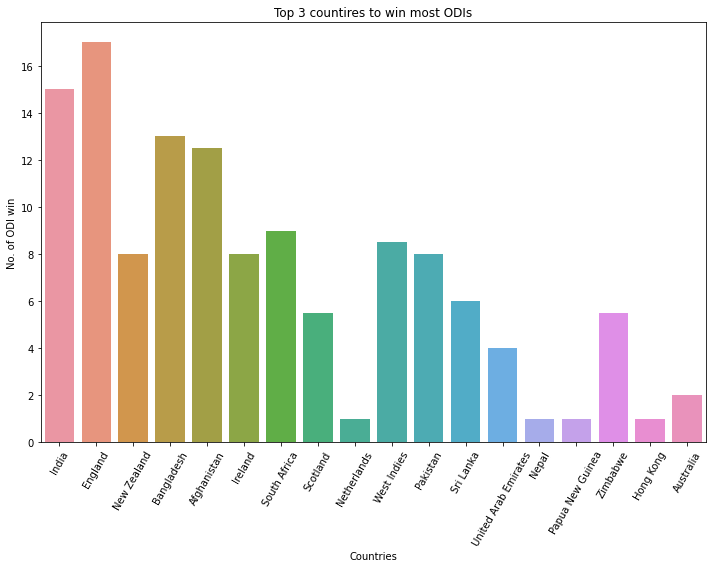

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(result['countries'], result['wins'])
plt.xlabel("Countries")
plt.xticks(rotation = 60)
plt.ylabel("No. of ODI win")
plt.title('Top 3 countires to win most ODIs')
plt.tight_layout()

#### Most ODI win
- <b>England</b>
- <b>India</b>
- <b>Bangladesh</b>

### Q4) Based on the ground map the country. 

In [50]:
ground_df = pd.DataFrame({'countries':data['Ground'].value_counts().keys(), 'count':data['Ground'].value_counts()})
ground_df.reset_index(drop=True, inplace = True)
ground_df

,countries,count
0,Harare,16
1,Bulawayo,12
2,Dhaka,10
3,Dubai (DSC),8
4,Abu Dhabi,7
5,ICCA Dubai,6
6,Sharjah,5
7,Pallekele,4
8,Belfast,3
9,Dambulla,3


In [51]:
def get_lat(place):
    
    return gis.geocode(place).latitude

def get_lon(place):
    return gis.geocode(place).longitude

In [55]:
ground = data['Ground'].value_counts().keys()
lat = []
lon = []
for i in ground:
    lat.append(gis.geocode(i).latitude)
    lon.append(gis.geocode(i).longitude)

In [56]:
map_country = folium.Map(location=([-6.475590, 145.253801]))
fg = folium.FeatureGroup(name = 'country')

for i in range(len(ground)):
    fg.add_child(folium.Marker(location = [lat[i], lon[i]], popup=ground[i], icon=folium.Icon(color = 'pink')))
    
map_country.add_child(fg)

### Q5) Top 3 wins by runs

In [82]:
win_by_run = data[data['first_batting'] != " "][['Winner', 'first_batting']]
win_by_run['first_batting'] = win_by_run['first_batting'].str.replace(" runs", '')
win_by_run['first_batting'] = win_by_run['first_batting'].astype('int')
win_by_run.sort_values('first_batting', ascending = False)[:10]

,Winner,first_batting
74,Pakistan,244
65,England,242
49,Ireland,226
116,India,224
111,Sri Lanka,219
69,Pakistan,201
3,New Zealand,183
85,Sri Lanka,178
13,Bangladesh,163
26,Afghanistan,154


### Top 3 wins by runs 
* Pakistan
* England
* Ireland

### Q6) Month in which most ODIs were played

In [83]:
data

,index,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,first_batting,second_batting
0,0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,61 runs,
1,1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,,8 wickets
2,2,United Arab Emirates,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,,4 wickets
3,3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,183 runs,
4,4,United Arab Emirates,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,67 runs,
...,...,...,...,...,...,...,...,...,...,...
121,122,New Zealand,Pakistan,Pakistan,6 wickets,Abu Dhabi,2018-11-09,ODI # 4068,,6 wickets
122,123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069,40 runs,
123,125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071,,5 wickets
124,126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072,,4 wickets


In [85]:
data['month'] = pd.DatetimeIndex(data['Match Date']).month

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'no of matches')

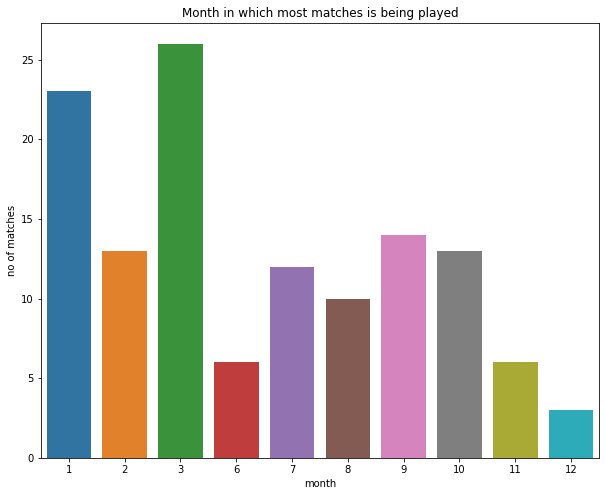

In [90]:
plt.figure(figsize = (10, 8))
sns.barplot(data['month'].value_counts().keys(), data['month'].value_counts())
plt.title('Month in which most matches is being played')
plt.xlabel('month')
plt.ylabel('no of matches')

## March

## External Knowledge
* Hong Kong lost their ODI status in March 2018 after losing to the Netherlands in a play-off match during the 2018 Cricket World Cup Qualifier.
* Papua New Guinea lost both their ODI and T20 status in March 2018 after losing a playoff match against Nepal during the 2018 Cricket World Cup Qualifier, a result that earned ODI and T20I status for their opponents.